# DMML Assignment 1

In [643]:
#import relevant libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import time
%matplotlib inline

In [644]:
#read data into dataframe
data = pd.read_csv("bank-additional-full.csv",sep = ";")

In [645]:
data.shape

(41188, 21)

In [646]:
data.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Cleaning And Processing Data

In [647]:
# replace string "unknown" with NaN value

data['job'].replace('unknown',np.nan,inplace = True)
data['education'].replace('unknown',np.nan,inplace = True)
data['marital'].replace('unknown',np.nan,inplace = True)
data['loan'].replace('unknown',np.nan,inplace=True)
data['housing'].replace('unknown',np.nan,inplace=True)


In [648]:
data['poutcome'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [649]:
data['poutcome'].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [650]:
#data['poutcome'].replace('nonexistent',np.nan,inplace=True)
#data['poutcome'].fillna(0,inplace = True)
#replace the null values with the mode

In [651]:
data.isnull().sum()

#number of null values in each column. 

age                  0
job                330
marital             80
education         1731
default              0
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

Now we clean the data, we convert the binary type values to 1s and 0s and use OneHot Encoding to encode attributes with categorical features like 'marital', 'education', 'Month', 'day_of_week'

In [652]:
data['loan'] = data['loan'].replace('yes',1)
data['loan'] = data['loan'].replace('no',0)


data['housing'] = data['housing'].replace('yes',1)
data['housing'] = data['housing'].replace('no',0)

data['contact'] = data['contact'].replace('telephone',1)
data['contact'] = data['contact'].replace('cellular',0)

data['default'] = data['default'].replace('yes',1)
data['default'] = data['default'].replace('no',0)
#data['default'].replace('unknown',np.nan,inplace=True)

data['poutcome'] = data['poutcome'].replace('success',1)
data['poutcome'] = data['poutcome'].replace('failure',0)

data['y'] = data['y'].replace('yes',1)
data['y'] = data['y'].replace('no',0)

In [653]:
data['default'].value_counts()

0          32588
unknown     8597
1              3
Name: default, dtype: int64

In [654]:
data['default'].replace("unknown",0,inplace = True)

In [655]:
data['job'].dropna(axis = 0,inplace = True)
data['education'].dropna(axis = 0,inplace = True)
data['marital'].dropna(axis = 0,inplace = True)

In [656]:
# One Hot Encode Categorical Attributes
jobs = pd.get_dummies(data['job'])
marital = pd.get_dummies(data['marital'])
edu = pd.get_dummies(data['education'])
months = pd.get_dummies(data['month'])
week = pd.get_dummies(data['day_of_week'])

In [657]:
data = data.join(jobs)
data = data.join(marital)
data = data.join(edu)
data = data.join(months)
data = data.join(week)

In [658]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'admin.',
       'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired',
       'self-employed', 'services', 'student', 'technician', 'unemployed',
       'divorced', 'married', 'single', 'basic.4y', 'basic.6y', 'basic.9y',
       'high.school', 'illiterate', 'professional.course', 'university.degree',
       'apr', 'aug', 'dec', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep',
       'fri', 'mon', 'thu', 'tue', 'wed'],
      dtype='object')

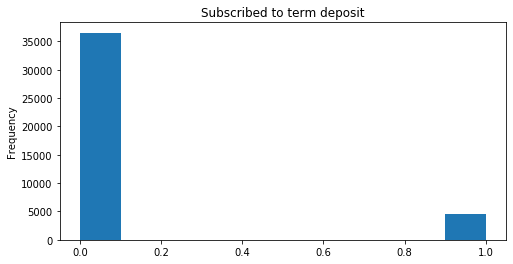

In [765]:
plt.figure(figsize=(8,4))
data['y'].plot.hist(data['y'])
plt.title("Subscribed to term deposit")
plt.show()

In [660]:
data['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

As we can see, the number of clients that did not subsribe to the term deposit is a lot higher than the ones who did. 
Therefore, this is an imbalanced dataset where majority class makes up for 88.7% of the dataset and minority class makes up 11.3%

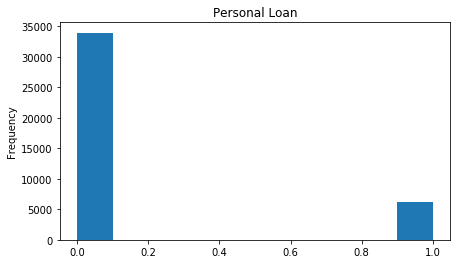

In [764]:
plt.figure(figsize=(7,4))
data['loan'].plot.hist(data['loan'])
plt.title("Personal Loan")
plt.show()

In [662]:
data['loan'].value_counts()

0.0    33950
1.0     6248
Name: loan, dtype: int64

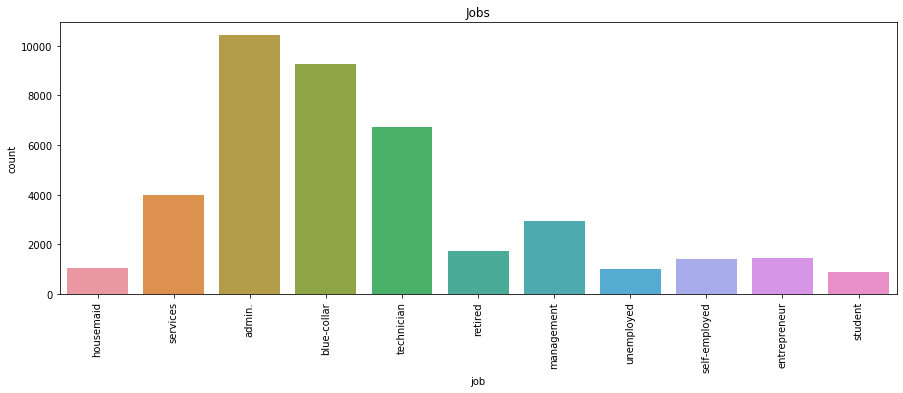

In [762]:
plt.figure(figsize=(15,5))
sns.countplot(x = data['job'])
plt.title("Jobs")
plt.xticks(rotation = 90)
plt.show()

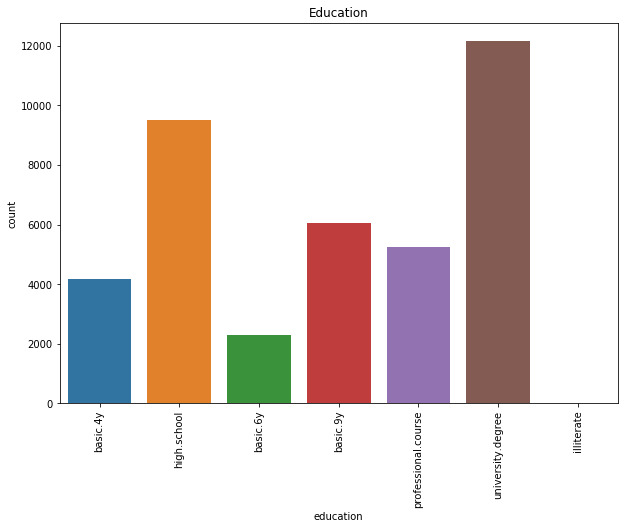

In [770]:
plt.figure(figsize=(10,7))
sns.countplot(x = data['education'])
plt.title("Education")
plt.xticks(rotation = 90)
plt.show()

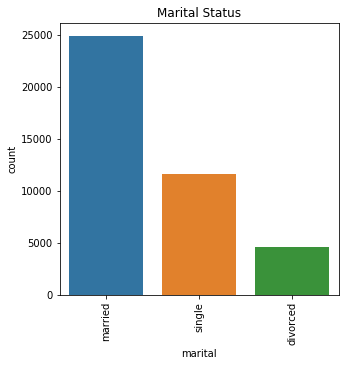

In [664]:
plt.figure(figsize=(5,5))
sns.countplot(x = data['marital'])
plt.xticks(rotation = 90)
plt.title("Marital Status")
plt.show()

We list the attributes of interest to input into our Machine Learning Algorithms

In [665]:
attributes = ['age', 'default', 'housing', 'loan',
       'contact','duration','campaign', 'pdays',
       'previous',  'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed',
       'divorced', 'married', 'single', 'basic.4y', 'basic.6y', 'basic.9y',
       'high.school', 'illiterate', 'professional.course', 'university.degree',
       'apr', 'may',
       'y']

In [666]:
targetvar = ['age', 'default', 'housing', 'loan',
       'contact', 'duration', 'campaign', 'pdays',
       'previous',  'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed',
       'divorced', 'married', 'single', 'basic.4y', 'basic.6y', 'basic.9y',
       'high.school', 'illiterate', 'professional.course', 'university.degree',
       'apr', 'may',]

## Train Test Split And Undersampling the Data

In [714]:
newdata = data[attributes].dropna(axis = 0)

In [715]:
x = newdata[targetvar]
y = newdata['y']

In [747]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

Now, we try to balance the data set.
First we split the data into Train and Test Sets.
Next we Seperate out the majority and minority class in the Train set.
Then we undersample the Majority class with n equal to the number of rows in minority class.
Splitting the data into train and test is important to make sure we do not feed the training data as test data into the algorithm which will just inflate the Metrics

In [748]:
train_data = pd.concat([X_train,y_train],axis = 1)
# Concatenate the dataset to undersample 

In [749]:
majorityclass = train_data[train_data['y']==0]
minorityclass = train_data[train_data['y']==1]

In [750]:
minorityclass.shape

(3413, 27)

In [751]:
majorityclass.shape

(27336, 27)

In [752]:
majority_under_sample = majorityclass.sample(n = minorityclass.shape[0])

In [753]:
majority_under_sample.shape

(3413, 27)

In [754]:
balanced_data = pd.concat([majority_under_sample, minorityclass])


balanced_data contains equal number of rows of majority and minority class

In [755]:
balanced_data.shape

(6826, 27)

In [756]:
X_train_new, y_train_new = balanced_data[targetvar], balanced_data['y']
#Split the data sets again

## Random Forest

In [757]:
rfstart = time.time()
rfclf = RandomForestClassifier(n_estimators=500,bootstrap = True,oob_score = True)
rfclf.fit(X_train_new,y_train_new)
rfpred = rfclf.predict(X_test)
time4rf = time.time() - rfstart

In [709]:
print("Time taken by Random Forest Classifier is ",time4rf, "seconds")

Time taken by Random Forest Classifier is  7.795130252838135 seconds


In [710]:
importances = rfclf.feature_importances_

In [711]:
for name, score in zip(X_train_new,rfclf.feature_importances_):
    print(name, score*100)

age 7.264042613762464
default 0.0
housing 1.4337571365410309
loan 0.99395808858095
contact 1.3385526268827144
duration 42.181163537713026
campaign 3.5960616269193446
pdays 2.4191844288866107
previous 1.5815128536502063
emp.var.rate 4.430514308267357
cons.price.idx 3.1668934528556196
cons.conf.idx 3.6508229048976397
euribor3m 11.97082449505427
nr.employed 7.654835667072213
divorced 0.5628195532065583
married 0.8872617937294877
single 0.8526016885437433
basic.4y 0.5858799415180957
basic.6y 0.4038150902858083
basic.9y 0.8135541572545303
high.school 0.8829330929687681
illiterate 0.006043257118145538
professional.course 0.7262353773251635
university.degree 1.1331636305631516
apr 0.3892976604351021
may 1.0742710159679976


Here we have removed attributes with low features importance such that removing those wont affect the metrics negatively

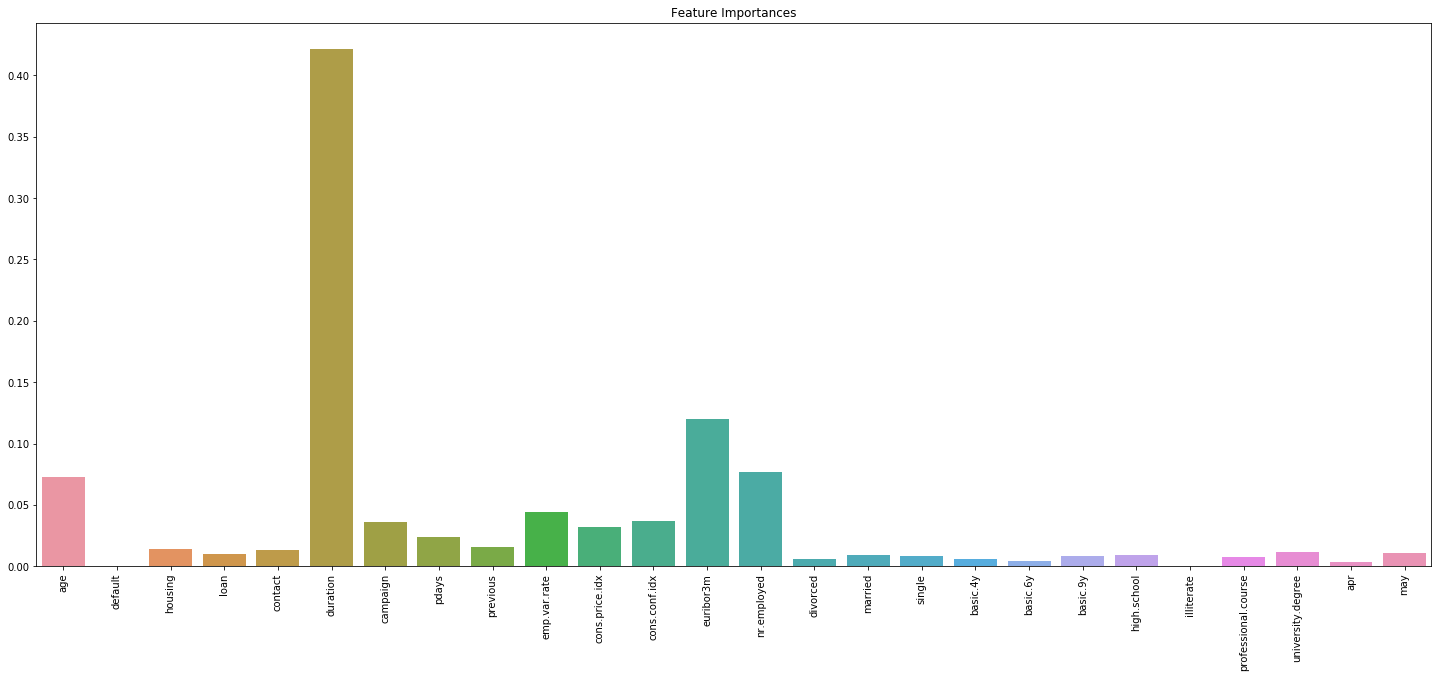

In [712]:
plt.figure(figsize=(25,10))
sns.barplot(x = X_train_new.columns, y = importances)
plt.xticks(rotation = 90)
plt.title("Feature Importances")
plt.show()

In [758]:
print("Recall score = ",recall_score(y_test,rfpred))
print("Precision score = ",precision_score(y_test,rfpred))
print("Accuracy score = ",accuracy_score(y_test,rfpred))
print("F score = ",f1_score(y_test,rfpred))

Recall score =  0.9259259259259259
Precision score =  0.42849491162292447
Accuracy score =  0.8528876170655567
F score =  0.585865983156353


In [686]:
confusion_matrix(y_test,rfpred)

array([[5670, 1106],
       [  70,  842]], dtype=int64)

## Decision Tree

In [687]:
dtstart = time.time()
Dtree = DecisionTreeClassifier(random_state=0,min_samples_split = 2,criterion = "entropy")
Dtree.fit(X_train_new,y_train_new)
prediction = tree.predict(X_test)
time4dt = time.time() - dtstart


In [688]:
print("Time taken by Decision Tree classifier is ", time4dt, "Seconds")

Time taken by Decision Tree classifier is  0.06881332397460938 Seconds


In [689]:
print("Recall score = ",recall_score(y_test,prediction))
print("Precision score = ",precision_score(y_test,prediction))
print("Accuracy score = ",accuracy_score(y_test,prediction))
print("F score = ",f1_score(y_test,prediction))

Recall score =  0.9901315789473685
Precision score =  0.4841823056300268
Accuracy score =  0.8736992715920916
F score =  0.6503420957868203


In [690]:
tree_imp = Dtree.feature_importances_

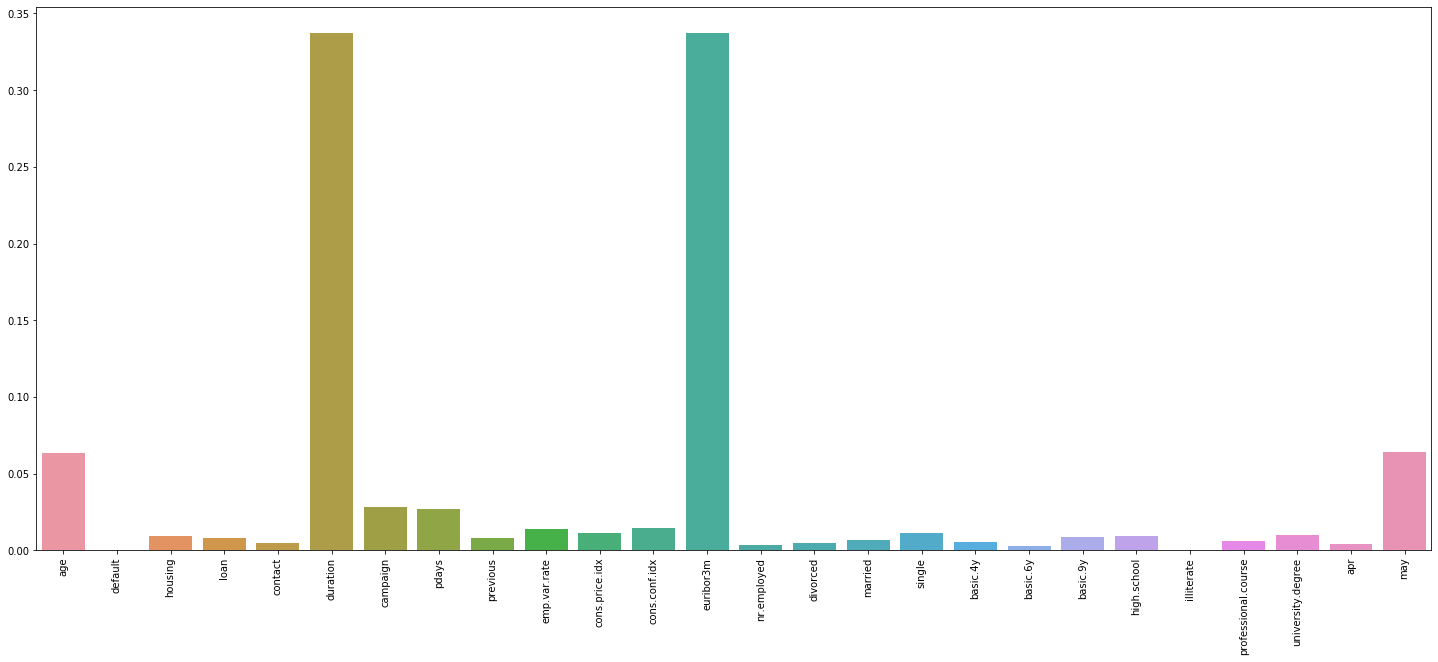

In [691]:
plt.figure(figsize=(25,10))
sns.barplot(x = X_train_new.columns, y = tree_imp)
plt.xticks(rotation = 90)
plt.show()

## Naive Bayes

In [759]:
nbstart = time.time()
bayesclf = GaussianNB()
bayesclf.fit(X_train_new,y_train_new)
bayes_pred = bayesclf.predict(X_test)
time4nb = time.time() - nbstart


In [760]:
print("Time taken by Decision Tree classifier is ", time4nb, "Seconds")

Time taken by Decision Tree classifier is  0.03390860557556152 Seconds


In [761]:
print("Recall score = ",recall_score(y_test,bayes_pred))
print("Precision score = ",precision_score(y_test,bayes_pred))
print("Accuracy score = ",accuracy_score(y_test,bayes_pred))
print("F score = ",f1_score(y_test,bayes_pred))

Recall score =  0.7210648148148148
Precision score =  0.3371212121212121
Accuracy score =  0.8093132154006244
F score =  0.4594395280235988


To Summarise:

Random Forest:

Recall score =  0.9416

Accuracy score =  0.8773

Decision Tree:

Recall score =  0.9932

Accuracy score =  0.8787

Naive Bayes:

Recall score =  0.7310

Accuracy score =  0.8084

We can see that Random Forest and Deision Tree perform Almost Similarly while Naive Bayes does not give a give performance
Recall is a much more important measure than Accuracy because even if we build a classifier that outputs 0 for every entry in test set, we still would get around 88% accuracy.
Having a high recall means we dont misclassify the people who can potentially subscribe to the term deposit.